**Clustering object: phân loại object cho data từ anh Trí**

In [12]:
from os import listdir
from os.path import isfile, join
import numpy as np
from PIL import Image
import os

# Kiểm tra file lỗi (không mở được và xóa)

In [13]:
### Bỏ đường dẫn đọc file ở đây
mypath = '/data_science/data_science/data/v1/fprint/fprint/fprint_19052022/fprint_tri/Tri_cmnd_vinh_processing'
imgpath = [mypath+"/"+f for f in listdir(mypath) if isfile(join(mypath, f))]

In [14]:
error_img =[]
for img in imgpath:
    try:
        Image.open(img)
    except:
        error_img.append(img)

In [15]:
error_img

[]

In [16]:
# import os
# for img in error_img:
#     os.remove(img)

# Bắt đầu chạy 

## VGG16 pretrained  - Feature Extractor

In [17]:
# for loading/processing the images  
#from tensorflow import keras
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import img_to_array 
from tensorflow.keras.applications.vgg16 import preprocess_input 

# models 
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [18]:
path = '/data_science/data_science/data/v1/fprint/fprint/fprint_19052022/fprint_tri/Tri_cmnd_vinh_processing/'
# change the workinag directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        flowers.append(file.name)

In [19]:
len(flowers)

24524

In [20]:
# load the image as a 224x224 array
img = load_img(flowers[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)
(224, 224, 3)

(224, 224, 3)


(224, 224, 3)

In [21]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [22]:
x = preprocess_input(reshaped_img)

In [23]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

2022-05-26 10:36:24.198964: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-26 10:36:24.199020: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-26 10:36:24.199058: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (333f7846da3b): /proc/driver/nvidia/version does not exist


553467096/553467096 [==============================] - 51s 0us/step


In [24]:
features = model.predict(x)
print(features.shape)

1/1 [==============================] - 0s 400ms/step
(1, 4096)


In [25]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
# # for loading/processing the images  
# from tensorkeras.preprocessing.image import load_img 
# from keras.preprocessing.image import img_to_array 
# from keras.applications.vgg16 import preprocess_input 

# # models 
# from keras.applications.vgg16 import VGG16 
# from keras.models import Model

# # clustering and dimension reduction
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

path = '/data_science/data_science/data/v1/fprint/fprint/fprint_19052022/fprint_tri/Tri_cmnd_vinh_processing/'
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        flowers.append(file.name)
            
            
            
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features
   
data = {}
p = '/home/jovyan/work/projects/binary_idcard_classification/save_data.pkl'

# # lop through each image in the dataset
# for flower in flowers:
#     # try to extract the features and update the dictionary
#     try:
#         feat = extract_features(flower,model)
#         data[flower] = feat
#     # if something fails, save the extracted features as a pickle file (optional)
#     except:
#         with open(p,'wb') as file:
#             pickle.dump(data,file)
for flower in flowers:
    feat = extract_features(flower,model)
    data[flower] = feat

1/1 [==============================] - 0s 170ms/step


1/1 [==============================] - 0s 222ms/step


1/1 [==============================] - 0s 190ms/step


In [65]:
# save_path = '/data_science/data_science/data/v1/fprint/fprint/fprint_19052022/fprint_tri/Tri_cmnd_vinh_processed/extracted_data.pkl'
# with open(save_path,'wb') as file:
#     pickle.dump(data,file)

In [ ]:
len(flowers)

## PCA - Giảm parameter (Do lớp cuối của Feature Extractor > 4000 nên giảm xuống)

In [ ]:
 # get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

# get the unique labels (from the flower_labels.csv)
unique_labels = ['1','2','3','4']

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=1000, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

## Clustering (K-means)

In [ ]:

# cluster feature vectors
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
        
   
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Clipping cluster size from 1444 to 30


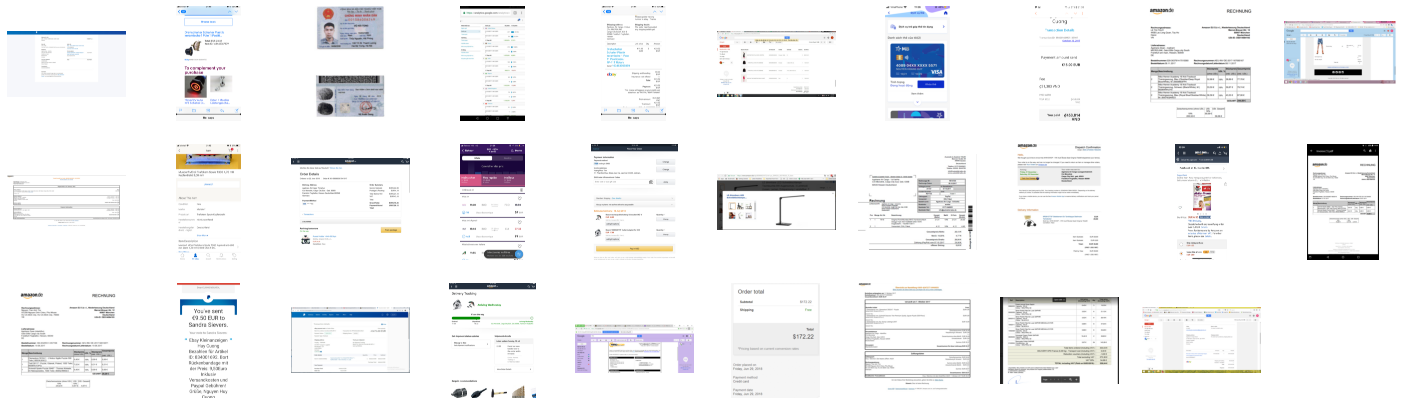

In [62]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
view_cluster(3)

## Copy qua group tương ứng

In [72]:
# import shutil
# keys = [1,2]
# for key in keys:
#     for item in groups[key]:
#         save_path_des = f'/data_science/data_science/data/v1/fprint/fprint/fprint_19052022/fprint_tri/Tri_cmnd_vinh_processed/group_{key}/'
#         save_path_src = f'/data_science/data_science/data/v1/fprint/fprint/fprint_19052022/fprint_tri/Tri_cmnd_vinh_processing/'
#         src = save_path_src + item
#         des = save_path_des + item
#         #print(src)
#         #print(des)
#         shutil.copy(src,des)

In [ ]:
path = '/data_science/data_science/data/v1/fprint/fprint/fprint_19052022/fprint_tri/Tri_cmnd_vinh_processing/'